<h2>Code to copy</h2>

Functions:

In [1]:
import scipy# for windowing and fourier analysis
import numpy as np# for logarithm and absolute values

# for visual inspection, peak detection, calcutation of loudness, masking, beats, roughness, or alike
# returns the magnitude spectrum of positive frequencies in dB
def magspecdB(array, window = "dirichlet"):
    N=len(array)
    if window=='blackmanharris':
        signal=array*scipy.signal.blackmanharris(N)
    elif window=='kaiser':
        signal=array*scipy.signal.kaiser(N,4)
    elif window=='bartlett':
        signal=array*scipy.signal.bartlett(N)
    else:
        signal=array
    spectrum = scipy.fft.fft(signal)
    with np.errstate(divide='ignore', invalid='ignore'):# this will suppress the "divide by zero" warning
        specdB = 20 * np.log10(np.abs(spectrum) / max(np.abs(spectrum)))
    specdB=specdB[0:int(len(specdB)/2)]
    return specdB

# for spectrum manipulation that can be followed by an inverse Fourier transform
# contains the complex amplitudes of all frequencies including aliasing frequencies (complex conjugate)
def spec(array,window='dirichlet'):
    N=len(array)
    if window=='bartlett':
        windowed = array*scipy.signal.bartlett(N)
    else:
        windowed = array
    spectrum = scipy.fft.fft(windowed)
    return spectrum

def timeseries(array):
    times = scipy.fft.ifft(array).real
    return times

<h2>How to use the code</h2>
How to calculate a spectrum:

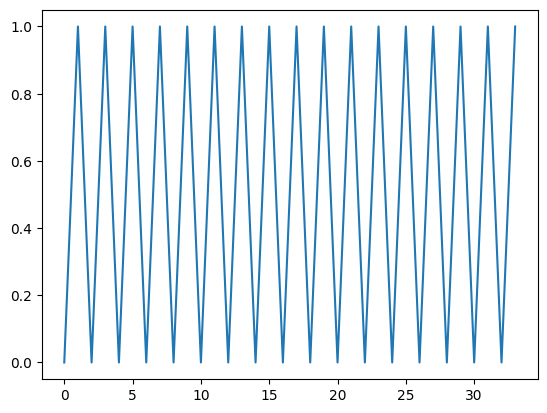

In [98]:
series=[0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]
speci=spec(series)

#just for plotting
import matplotlib.pyplot as plt
plt.plot(series)

This produces a complex spectrum:

In [100]:
spec(series)

array([ 1.70000000e+01-0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
        8.28201711e-16-3.20847052e-16j,  0.00000000e+00+0.00000000e+00j,
        3.28185886e-16-2.99180966e-16j,  6.69058849e-17-8.85977100e-17j,
        1.97947594e-16-3.97532359e-16j,  9.11480858e-17-3.20352292e-16j,
        2.04876914e-17-2.21097402e-16j, -2.04876914e-17-2.21097402e-16j,
       -9.11480858e-17-3.20352292e-16j, -1.97947594e-16-3.97532359e-16j,
       -6.69058849e-17-8.85977100e-17j, -3.28185886e-16-2.99180966e-16j,
        0.00000000e+00+0.00000000e+00j, -8.28201711e-16-3.20847052e-16j,
        0.00000000e+00+0.00000000e+00j, -1.70000000e+01-0.00000000e+00j,
        0.00000000e+00-0.00000000e+00j, -8.28201711e-16+3.20847052e-16j,
        0.00000000e+00-0.00000000e+00j, -3.28185886e-16+2.99180966e-16j,
       -6.69058849e-17+8.85977100e-17j, -1.97947594e-16+3.97532359e-16j,
       -9.11480858e-17+3.20352292e-16j, -2.04876914e-17+2.21097402e-16j,
        2.04876914e-17+2.21097402e-16j,  9.11480858

The real parts, imaginary parts, amplitude and phase can be called as follows:

In [101]:
print(speci.real)# real
print(speci.imag)# imaginary
print(abs(speci))# amplitude
print(np.angle(speci))# phase

[ 1.70000000e+01  0.00000000e+00  8.28201711e-16  0.00000000e+00
  3.28185886e-16  6.69058849e-17  1.97947594e-16  9.11480858e-17
  2.04876914e-17 -2.04876914e-17 -9.11480858e-17 -1.97947594e-16
 -6.69058849e-17 -3.28185886e-16  0.00000000e+00 -8.28201711e-16
  0.00000000e+00 -1.70000000e+01  0.00000000e+00 -8.28201711e-16
  0.00000000e+00 -3.28185886e-16 -6.69058849e-17 -1.97947594e-16
 -9.11480858e-17 -2.04876914e-17  2.04876914e-17  9.11480858e-17
  1.97947594e-16  6.69058849e-17  3.28185886e-16  0.00000000e+00
  8.28201711e-16  0.00000000e+00]
[-0.00000000e+00  0.00000000e+00 -3.20847052e-16  0.00000000e+00
 -2.99180966e-16 -8.85977100e-17 -3.97532359e-16 -3.20352292e-16
 -2.21097402e-16 -2.21097402e-16 -3.20352292e-16 -3.97532359e-16
 -8.85977100e-17 -2.99180966e-16  0.00000000e+00 -3.20847052e-16
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  3.20847052e-16
 -0.00000000e+00  2.99180966e-16  8.85977100e-17  3.97532359e-16
  3.20352292e-16  2.21097402e-16  2.21097402e-16  3.2035

You can easily plot this:

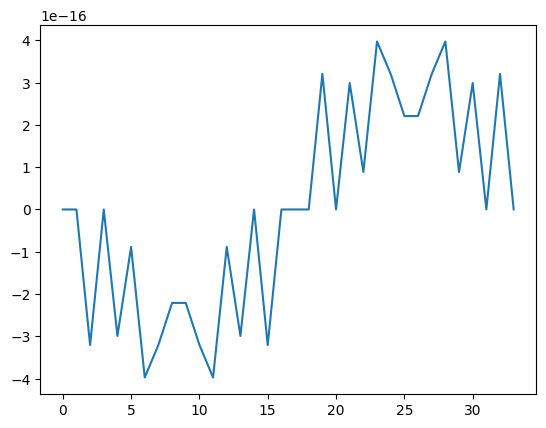

In [105]:
plt.plot(speci.imag)

How to transform a spectrum (back) into a time series:

[0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]


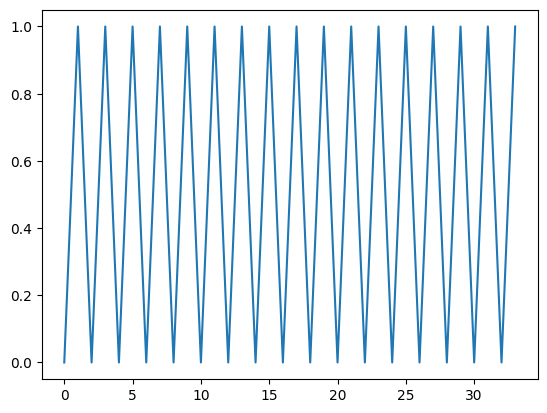

In [106]:
seri=timeseries(speci)
print(seri)

plt.plot(seri)

How to calculate a spectrum using a bartlett window:

In [107]:
speci=spec(series,'bartlett')

The reproduced time series still contains the Bartlett windowing:

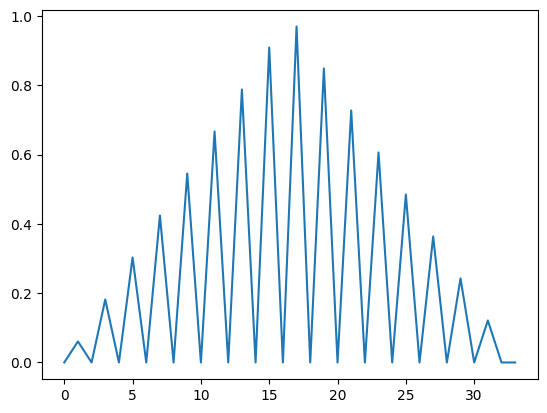

In [108]:
seri=timeseries(speci)
plt.plot(seri)

If you analyze time windows with <i>50</i>% overlap, you can simply sum up the time series.

<h2>One Example</h2>

0.90065


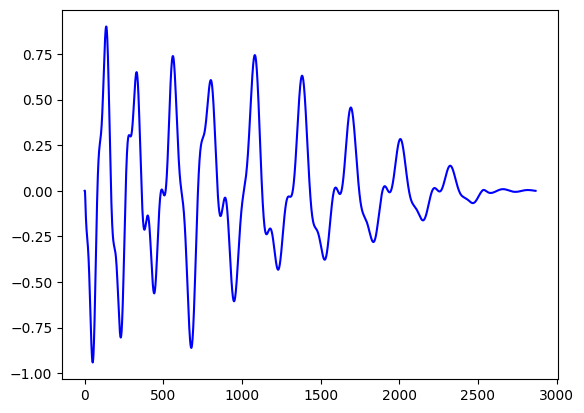

In [110]:
import librosa
data, samplerate = librosa.load(r'bassdrum.wav',sr=None)

if data.ndim >= 2:
    data = data[:,0]#this means that we only consider the first channel in multichannel audio
plt.plot(data,color = 'blue')#plots the result
print(max(data))

In [111]:
import IPython.display as ipd#can play audio files with a simple GUI
ipd.Audio(r'C:\python\gits\pymus\Codebase\acoustics-and-audio\bassdrum.wav')#to play back an audio file with a player GUI

In [116]:
ipd.Audio(data,rate=samplerate)#to play any array with the samplerate rate=sr

In [118]:
import sounddevice as sd#to play back sounds
sd.play(data, samplerate)#plays the array without a GUI

In [121]:
specdB = magspecdB(data,'blackmanharris')

(-60.0, 0.0)

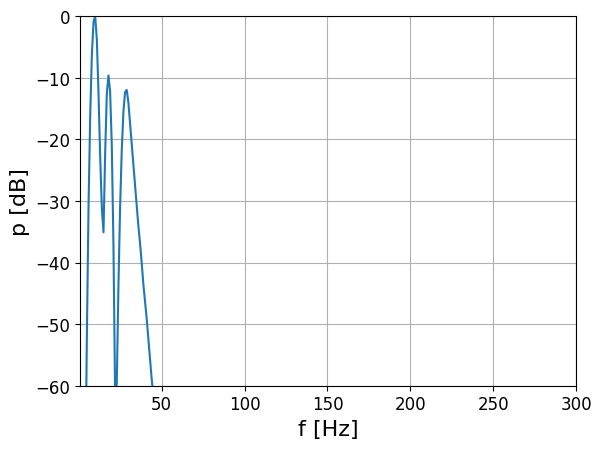

In [125]:
#xfreq = np.arange(0,samplerate,samplerate / N)#defines the frequencies of the frequency bins in the spectrum for the x-axis
plt.plot(specdB)#plot y over x
plt.grid()
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("f [Hz]", fontsize = 16)
plt.ylabel("p [dB]", fontsize = 16)
plt.xlim(1,300)
plt.ylim(-60,0)